In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

# 1. Analysis of Teams

In [327]:
print(matches.season.value_counts())
matches = matches[matches.season >= 2016]

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


In [328]:
matches.result.value_counts()

normal       235
tie            3
no result      1
Name: result, dtype: int64

In [330]:
matches = matches[matches['result']=='normal']
matches1 = matches.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)

matches1.dropna(inplace=True)

In [331]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0


In [332]:
team_1 = 'Mumbai Indians'
team_2 = 'Delhi Capitals'

In [333]:
matches1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Rising Pune Supergiants', 'Rajasthan Royals',
       'Chennai Super Kings', 'Delhi Capitals'], dtype=object)

In [334]:
print(len(matches1.groupby('team1').count()))
matches1.groupby('team1').count()

12


,id,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
team1,,,,,,,
Chennai Super Kings,12,12,12,12,12,12,12
Delhi Capitals,6,6,6,6,6,6,6
Delhi Daredevils,21,21,21,21,21,21,21
Gujarat Lions,13,13,13,13,13,13,13
Kings XI Punjab,30,30,30,30,30,30,30
Kolkata Knight Riders,27,27,27,27,27,27,27
Mumbai Indians,31,31,31,31,31,31,31
Rajasthan Royals,13,13,13,13,13,13,13
Rising Pune Supergiant,8,8,8,8,8,8,8


In [335]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [336]:
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(lambda x: x if x==team_1 else (x if x==team_2 else "Others"))


In [337]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Others,Others,Others,field,Others,35,0
1,2,Mumbai Indians,Others,Others,field,Others,0,7
2,3,Others,Others,Others,field,Others,0,10
3,4,Others,Others,Others,field,Others,0,6
4,5,Others,Delhi Capitals,Others,bat,Others,15,0


## The below plot suggest that teams generally chooses balling over batting. 

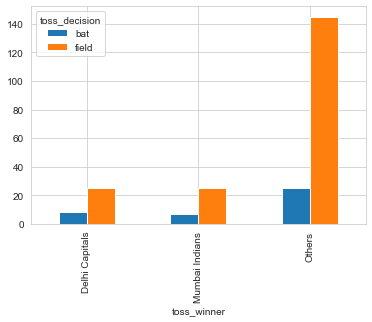

In [338]:
sns.set_style('whitegrid')
pd.crosstab(matches1.toss_winner, matches1.toss_decision).plot(kind='bar')

## The plot below suggests that Mumbai Indians will win the toss

Text(0.5, 1, 'Chances of Winning Toss')

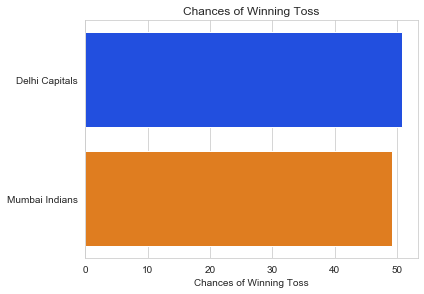

In [412]:
toss_wins = pd.DataFrame(matches1['toss_winner'].value_counts()[1:])
toss_wins['Chances of Winning Toss'] = toss_wins['toss_winner']*100/sum(toss_wins['toss_winner'])
sns.barplot(x=toss_wins['Chances of Winning Toss'], y=toss_wins.index, palette='bright')
plt.tight_layout()
plt.title('Chances of Winning Toss')

In [340]:
wins = pd.DataFrame(matches1['winner'].value_counts()[1:])

In [341]:
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100

## The plot below suggests that Mumbai Indians will win the match

Text(0.5, 1.0, 'Percentage of Winning')

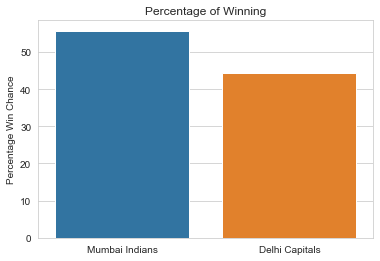

In [342]:
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

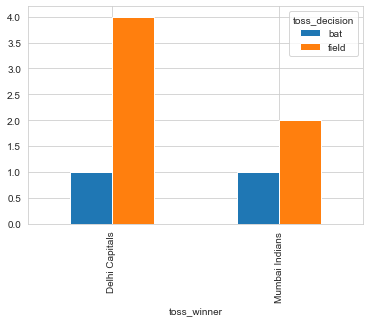

In [348]:
today_match = pd.concat([matches1[(matches1.team1 == team_1) & (matches1.team2 == team_2)], matches1[(matches1.team1 == team_2) & (matches1.team2 == team_1)]])
pd.crosstab(today_match.toss_winner, today_match.toss_decision).plot(kind='bar')

# 2. Analysis of Players and Stats

In [429]:
delivery.tail(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179068,11415,2,Chennai Super Kings,Mumbai Indians,19,3,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179069,11415,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179070,11415,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179071,11415,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,SR Watson,JJ Bumrah,0,...,4,0,0,0,4,4,8,NaN,NaN,NaN
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [456]:
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)
delivery.fillna(np.nan, inplace=True)

In [458]:
today_delivery = delivery[((delivery.batting_team==team_1) & (delivery.bowling_team==team_2)) | ((delivery.batting_team==team_2) & (delivery.bowling_team==team_1))].copy()
today_delivery['player_dismissed'] = today_delivery['player_dismissed'].apply(lambda x: 0 if x==np.nan else 1)

In [461]:
today_delivery.pivot_table(index='match_id', columns='bowler', values='player_dismissed')['K Rabada']

match_id
24       1.0
44       1.0
82       NaN
109      NaN
150      NaN
170      NaN
183      NaN
221      NaN
238      NaN
282      NaN
327      NaN
342      NaN
390      NaN
408      NaN
473      NaN
508      NaN
539      NaN
556      NaN
593      NaN
623      NaN
7902     NaN
7948     NaN
11139    1.0
11325    1.0
Name: K Rabada, dtype: float64

In [463]:
delivery[delivery.batsman=='R Sharma']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
45930,195,1,Deccan Chargers,Rajasthan Royals,19,1,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
45931,195,1,Deccan Chargers,Rajasthan Royals,19,2,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
45932,195,1,Deccan Chargers,Rajasthan Royals,19,3,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
45933,195,1,Deccan Chargers,Rajasthan Royals,19,4,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
45934,195,1,Deccan Chargers,Rajasthan Royals,19,5,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,0,0,0,R Sharma,caught,AA Jhunjhunwala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93597,395,2,Pune Warriors,Mumbai Indians,20,4,R Sharma,B Kumar,KA Pollard,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
93598,395,2,Pune Warriors,Mumbai Indians,20,5,R Sharma,B Kumar,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
95322,402,2,Pune Warriors,Sunrisers Hyderabad,19,5,R Sharma,MK Pandey,A Mishra,0,...,0,0,0,0,0,0,0,R Sharma,bowled,NaN
100161,422,2,Pune Warriors,Chennai Super Kings,20,3,R Sharma,B Kumar,DJ Bravo,0,...,0,0,0,0,0,0,0,R Sharma,caught,SK Raina
